<a href="https://colab.research.google.com/github/Shallom12/Autonomous-driving-of-Chungnam-Human-Resources-Development-Institute/blob/main/%5BProject_0626%5D_%EC%9E%90%EC%9C%A8%EC%A3%BC%ED%96%89_%EA%B0%9C%EB%B0%9C_%ED%95%B5%EC%8B%AC_%EB%B3%80%EC%88%98_%EA%B0%80%EC%9D%B4%EB%93%9C_%EB%B0%8F_%E1%84%82%E1%85%A1%E1%86%AF%E1%84%8A%E1%85%B5_%E1%84%87%E1%85%A7%E1%86%AB%E1%84%92%E1%85%AA%E1%84%8B%E1%85%A6_%E1%84%84%E1%85%A1%E1%84%85%E1%85%B3%E1%86%AB_%E1%84%80%E1%85%AE%E1%86%AB_%E1%84%80%E1%85%A1%E1%86%B7%E1%84%8B%E1%85%A7%E1%86%B7%E1%84%87%E1%85%A7%E1%86%BC_%E1%84%8C%E1%85%A5%E1%86%BC%E1%84%87%E1%85%A9_EDA_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8_%E1%84%86%E1%85%B5%E1%86%BE_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5_%E1%84%89%E1%85%B5%E1%84%80%E1%85%A1%E1%86%A8%E1%84%92%E1%85%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 자율주행 개발 핵심 변수 가이드

> 자율주행 시스템 개발에서 필수적으로 사용되는 변수들을 카테고리별로 정리한 실무 가이드입니다.

## 📋 목차

- [차량 상태 변수](#-차량-상태-변수-vehicle-state)
- [제어 변수](#-제어-변수-control-variables)
- [경로 계획 변수](#-경로-계획-변수-path-planning)
- [센서 데이터 변수](#-센서-데이터-변수-sensor-data)
- [안전 및 충돌 회피 변수](#-안전-및-충돌-회피-변수-safety--collision-avoidance)
- [주행 모드 변수](#-주행-모드-변수-driving-modes)
- [환경 변수](#-환경-변수-environment)
- [시간 관련 변수](#-시간-관련-변수-time-related)
- [차량 물리적 특성 변수](#-차량-물리적-특성-변수-vehicle-physical-properties)

---

## 📍 차량 상태 변수 (Vehicle State)

차량의 현재 위치, 방향, 속도 등 기본적인 상태 정보를 저장하는 변수들입니다.

### 🗺️ 위치 정보 (Position Information)

```python
# 3D 공간에서의 차량 위치
x, y, z = 0.0, 0.0, 0.0        # 차량의 3D 좌표 (미터 단위)

# 차량의 방향 정보
heading = 0.0                   # 차량의 방향각 (yaw) - 좌우 회전
pitch = 0.0                     # 차량의 앞뒤 기울기 (상하 각도)
roll = 0.0                      # 차량의 좌우 기울기 (롤링 각도)
```

### 🏃‍♂️ 속도 정보 (Velocity Information)

```python
# 직선 운동 관련
velocity = 0.0                  # 현재 속도 (km/h 또는 m/s)
acceleration = 0.0              # 가속도 (m/s²)

# 회전 운동 관련
angular_velocity = 0.0          # 각속도 (rad/s) - 회전 속도
```

---

## 🎮 제어 변수 (Control Variables)

차량의 움직임을 직접 제어하는 명령값들을 저장하는 변수들입니다.

### 🔄 조향 제어 (Steering Control)

```python
steering_angle = 0.0            # 현재 조향각 (도 단위)
max_steering_angle = 30.0       # 최대 조향각 제한 (물리적 한계)

# 조향 방향 예시
# steering_angle > 0  : 우회전
# steering_angle = 0  : 직진
# steering_angle < 0  : 좌회전
```

### ⚡ 속도 제어 (Speed Control)

```python
# 액셀/브레이크 제어 (0~1 범위)
throttle = 0.0                  # 스로틀 개도 (0: 없음, 1: 최대)
brake = 0.0                     # 브레이크 강도 (0: 없음, 1: 최대)

# 속도 목표값
target_speed = 30.0             # 목표 속도 (km/h)
max_speed = 60.0                # 최대 허용 속도 (안전 제한)
```

---

## 🗺️ 경로 계획 변수 (Path Planning)

차량이 목적지까지 이동할 경로와 관련된 변수들입니다.

### 📍 웨이포인트 (Waypoints)

```python
# 경로 관련 데이터 구조
waypoints = []                  # 경로상의 모든 점들
target_waypoint = None          # 현재 목표로 하는 점
path = []                       # 계획된 상세 경로
route = []                      # 전체 루트 (큰 구간들)

# 거리 계산
distance_to_target = 0.0        # 현재 목표점까지의 거리
lookahead_distance = 10.0       # 전방 주시 거리 (경로 추종용)
```

### 🌏 실제 GPS 좌표 예시

```python
# 서울/경기도 지역의 실제 waypoints 예시
waypoints = np.array([
    [127.123, 37.456],          # 시작점 (강남구 근처)
    [127.126, 37.456],          # 안전 접근
    [127.130, 37.463],          # 장애물1 위로 회피
    [127.134, 37.462],          # 장애물2 아래로 회피
    [127.139, 37.468],          # 장애물3 위로 회피
    [127.143, 37.474],          # 목적지 접근
    [127.145, 37.478]           # 최종 목적지
])

# GPS 좌표 분해
start_position = waypoints[0]   # [127.123, 37.456] - 시작점
current_lon = start_position[0] # 127.123 (경도, longitude)
current_lat = start_position[1] # 37.456 (위도, latitude)
```

#### 🌍 GPS 좌표계 이해하기

| 용어 | 영문 | 의미 | 방향 |
|------|------|------|------|
| **경도** | longitude (lon) | 동서 방향 위치 | 세로선 (동경/서경) |
| **위도** | latitude (lat) | 남북 방향 위치 | 가로선 (북위/남위) |

> 💡 **좌표 해석**: `[127.123, 37.456]`은 동경 127.123도, 북위 37.456도를 의미하며, 서울 강남구 근처의 실제 위치입니다.

---

## 📡 센서 데이터 변수 (Sensor Data)

다양한 센서로부터 수집되는 데이터를 저장하는 변수들입니다.

### 📷 카메라 데이터 (Camera Data)

```python
camera_data = None              # 카메라로 촬영한 이미지 데이터
lane_lines = []                 # 감지된 차선 정보 리스트
traffic_signs = []              # 인식된 교통 표지판 리스트
traffic_lights = []             # 감지된 신호등 정보

# 영상 처리 결과
detected_objects = []           # 인식된 모든 객체들
pedestrians = []                # 보행자 정보
vehicles = []                   # 다른 차량 정보
```

### 🌊 라이다 데이터 (LiDAR Data)

```python
lidar_points = []               # 라이다 포인트 클라우드 데이터
obstacles = []                  # 감지된 장애물 리스트
point_cloud_intensity = []      # 각 포인트의 반사 강도

# 3D 공간 정보
distance_map = []               # 거리 맵 (2D 배열)
height_map = []                 # 높이 맵 (지형 정보)
```

### 🛰️ GPS 데이터 (GPS Data)

```python
gps_lat, gps_lon = 0.0, 0.0    # 현재 GPS 좌표 (위도, 경도)
gps_altitude = 0.0              # 해발 고도 (미터)
gps_accuracy = 0.0              # GPS 정확도 (미터 단위 오차)
gps_timestamp = 0.0             # GPS 데이터 수신 시간

# GPS 상태 정보
gps_fix_type = "3D"             # GPS 고정 타입 (2D/3D)
satellite_count = 8             # 연결된 위성 수
```

---

## ⚠️ 안전 및 충돌 회피 변수 (Safety & Collision Avoidance)

차량의 안전한 주행을 위한 충돌 감지 및 회피 관련 변수들입니다.

### 🚨 충돌 감지 (Collision Detection)

```python
collision_detected = False      # 충돌 위험 감지 여부
safety_distance = 5.0           # 최소 안전 거리 (미터)
emergency_brake = False         # 비상 브레이크 활성화 여부

# 위험도 평가
collision_risk_level = 0        # 충돌 위험도 (0: 안전 ~ 10: 매우 위험)
time_to_collision = float('inf') # 충돌까지 예상 시간 (초)
```

### 🚗 주변 차량 정보 (Surrounding Vehicles)

```python
nearby_vehicles = []            # 주변 차량들의 정보 리스트
front_vehicle_distance = float('inf')  # 앞차와의 거리
rear_vehicle_distance = float('inf')   # 뒤차와의 거리
left_vehicle_distance = float('inf')   # 좌측 차량과의 거리
right_vehicle_distance = float('inf')  # 우측 차량과의 거리

# 각 차량의 상세 정보 (딕셔너리 형태로 저장)
vehicle_info = {
    'id': 1,                    # 차량 식별 ID
    'position': [x, y],         # 차량 위치
    'velocity': 30.0,           # 차량 속도
    'direction': 45.0,          # 진행 방향
    'distance': 15.0            # 우리 차량과의 거리
}
```

---

## 🚦 주행 모드 변수 (Driving Modes)

차량의 다양한 주행 상태와 모드를 관리하는 변수들입니다.

### 🎯 주행 상태 (Driving State)

```python
# 주행 모드 종류
driving_mode = "NORMAL"         # 현재 주행 모드
# 가능한 값: "NORMAL", "PARKING", "EMERGENCY", "MANUAL", "HIGHWAY"

autonomous_mode = True          # 자율주행 모드 활성화 여부
lane_change_mode = False        # 차선 변경 모드 여부
parking_mode = False            # 주차 모드 여부

# 특수 상황 모드
overtaking_mode = False         # 추월 모드
reversing_mode = False          # 후진 모드
```

### 🔄 모드 전환 (Mode Switching)

```python
mode_switch_request = None      # 모드 전환 요청
mode_transition_time = 0.0      # 모드 전환에 걸리는 시간
previous_mode = "NORMAL"        # 이전 주행 모드 (복구용)
```

---

## 🌦️ 환경 변수 (Environment)

주변 환경과 도로 상황에 관한 정보를 저장하는 변수들입니다.

### ☀️ 날씨 및 도로 상태 (Weather & Road Conditions)

```python
# 날씨 정보
weather_condition = "CLEAR"     # 날씨 상태
# 가능한 값: "CLEAR", "RAIN", "SNOW", "FOG", "CLOUDY"

road_condition = "DRY"          # 도로 상태
# 가능한 값: "DRY", "WET", "ICY", "SNOWY"

visibility = 100.0              # 가시거리 (미터)
temperature = 20.0              # 외부 온도 (섭씨)
humidity = 50.0                 # 습도 (%)
wind_speed = 5.0                # 풍속 (m/s)
```

### 🚦 교통 상황 (Traffic Conditions)

```python
# 교통 신호 및 규칙
traffic_light_state = "GREEN"   # 현재 신호등 상태
# 가능한 값: "RED", "YELLOW", "GREEN", "UNKNOWN"

speed_limit = 50.0              # 현재 구간 제한 속도 (km/h)
road_type = "CITY"              # 도로 타입
# 가능한 값: "HIGHWAY", "CITY", "RESIDENTIAL", "PARKING_LOT"

traffic_density = "LIGHT"       # 교통 밀도
# 가능한 값: "LIGHT", "MODERATE", "HEAVY", "JAM"
```

---

## ⏰ 시간 관련 변수 (Time Related)

시뮬레이션이나 실시간 처리를 위한 시간 관련 변수들입니다.

### 🕐 시간 정보 (Time Information)

```python
current_time = 0.0              # 현재 시간 (유닉스 타임스탬프)
dt = 0.1                        # 시간 간격/타임스텝 (초)
simulation_time = 0.0           # 시뮬레이션 시작부터 경과 시간

# 프레임 관리
frame_count = 0                 # 처리된 프레임 수
fps = 30.0                      # 초당 프레임 수
last_update_time = 0.0          # 마지막 업데이트 시간

# 성능 측정
processing_time = 0.0           # 한 프레임 처리 시간
average_processing_time = 0.0   # 평균 처리 시간
```

---

## 🚗 차량 물리적 특성 변수 (Vehicle Physical Properties)

차량의 물리적 특성과 성능 한계를 정의하는 변수들입니다.

### 📏 차량 크기 (Vehicle Dimensions)

```python
# 기본 치수 (미터 단위)
vehicle_length = 4.5            # 차량 전체 길이
vehicle_width = 1.8             # 차량 전체 너비
vehicle_height = 1.5            # 차량 높이
wheelbase = 2.7                 # 앞뒤 바퀴 축간거리

# 안전 마진 포함 크기
safety_length = vehicle_length + 0.5    # 안전 여유분 포함 길이
safety_width = vehicle_width + 0.3      # 안전 여유분 포함 너비
```

### ⚡ 성능 파라미터 (Performance Parameters)

```python
# 가속/감속 성능
max_acceleration = 3.0          # 최대 가속도 (m/s²)
max_deceleration = -8.0         # 최대 감속도 (m/s²) - 음수값
emergency_deceleration = -10.0  # 비상 제동시 최대 감속도

# 조향 성능
turning_radius = 5.0            # 최소 회전 반경 (미터)
max_steering_rate = 15.0        # 최대 조향 변화율 (도/초)

# 엔진 성능
max_power = 200.0               # 최대 출력 (kW)
max_torque = 400.0              # 최대 토크 (Nm)
fuel_efficiency = 12.5          # 연비 (km/L)
```

---

## 💾 변수 초기화 예시

실제 프로젝트에서 사용할 수 있는 변수 초기화 코드입니다.

```python
class AutonomousVehicle:
    def __init__(self):
        # 차량 상태 초기화
        self.x, self.y, self.z = 0.0, 0.0, 0.0
        self.heading = 0.0
        self.velocity = 0.0
        
        # 제어 변수 초기화
        self.steering_angle = 0.0
        self.throttle = 0.0
        self.brake = 0.0
        
        # 안전 변수 초기화
        self.collision_detected = False
        self.safety_distance = 5.0
        
        # 환경 변수 초기화
        self.weather_condition = "CLEAR"
        self.speed_limit = 50.0
        
        # 물리적 특성 설정
        self.vehicle_length = 4.5
        self.max_acceleration = 3.0
        
    def update_state(self, dt):
        """차량 상태를 시간 간격 dt만큼 업데이트"""
        # 상태 업데이트 로직
        pass
```

---

## 🔧 실전 활용 팁

### 변수 명명 규칙
- **명확성**: 변수명만 봐도 용도를 알 수 있게 작성
- **일관성**: 프로젝트 전체에서 동일한 명명 규칙 사용
- **단위 명시**: 주석이나 변수명에 단위 포함 (`_m`, `_kmh` 등)

### 초기값 설정
- **안전 우선**: 안전한 기본값으로 초기화
- **물리적 한계**: 실제 차량의 물리적 한계를 반영
- **센서 무효값**: 센서 데이터는 유효하지 않은 값으로 초기화

### 데이터 타입 선택
- **정밀도**: 위치나 속도는 `float` 사용
- **메모리 효율**: 불필요한 정밀도는 피하기
- **numpy 배열**: 대량의 센서 데이터는 numpy 활용

---

## 📚 참고 자료

- [자율주행 차량 제어 시스템](https://en.wikipedia.org/wiki/Autonomous_car)
- [ROS (Robot Operating System)](https://www.ros.org/)
- [OpenCV 컴퓨터 비전](https://opencv.org/)
- [PCL (Point Cloud Library)](https://pointclouds.org/)

---

*이 가이드가 자율주행 프로젝트에 도움이 되었다면 ⭐ 스타를 눌러주세요!*

In [1]:
# 경로 계획 변수: waypoints 리스트 활용
# 각 웨이포인트는 [x좌표, y좌표] 형태의 리스트로 표현됩니다.
# 실제 자율주행에서는 위도, 경도 또는 더 복잡한 3D 좌표를 사용하지만,
# 여기서는 2D 평면상의 간단한 좌표로 가정합니다.

print("--- 1. 웨이포인트 리스트로 경로 만들기 ---")

# 우리의 자율주행차가 지나갈 웨이포인트들 (경유지들)
# [x, y] 좌표로 구성된 리스트의 리스트입니다.
# 예시: [10, 5]는 x=10, y=5 지점을 의미합니다.
waypoints = [
    [0, 0],     # 시작 지점
    [10, 0],    # 첫 번째 경유지
    [10, 5],    # 두 번째 경유지
    [20, 5],    # 세 번째 경유지
    [20, 10]    # 최종 목적지
]

print(f"전체 경로의 웨이포인트 개수: {len(waypoints)}개")
print(f"경로의 시작 지점: {waypoints[0]}") # 리스트의 첫 번째 요소 (인덱스 0)
print(f"경로의 최종 목적지: {waypoints[-1]}") # 리스트의 마지막 요소 (음수 인덱스 -1)

# 웨이포인트를 하나씩 방문하는 시뮬레이션
current_location = waypoints[0] # 현재 차량 위치는 시작 지점
print(f"\n현재 차량 위치: {current_location}")

for i, next_waypoint in enumerate(waypoints):
    # enumerate를 사용하면 인덱스(i)와 값(next_waypoint)을 동시에 얻을 수 있습니다.
    print(f"-> {i+1}번째 웨이포인트 ({next_waypoint[0]}, {next_waypoint[1]})로 이동합니다.")
    current_location = next_waypoint # 차량이 다음 웨이포인트에 도착했다고 가정

print(f"\n모든 웨이포인트를 방문하여 최종 목적지({current_location})에 도착했습니다!")

# 리스트에 새로운 웨이포인트를 추가할 수도 있습니다.
waypoints.append([25, 10])
print(f"새로운 웨이포인트 추가 후: {waypoints}")

--- 1. 웨이포인트 리스트로 경로 만들기 ---
전체 경로의 웨이포인트 개수: 5개
경로의 시작 지점: [0, 0]
경로의 최종 목적지: [20, 10]

현재 차량 위치: [0, 0]
-> 1번째 웨이포인트 (0, 0)로 이동합니다.
-> 2번째 웨이포인트 (10, 0)로 이동합니다.
-> 3번째 웨이포인트 (10, 5)로 이동합니다.
-> 4번째 웨이포인트 (20, 5)로 이동합니다.
-> 5번째 웨이포인트 (20, 10)로 이동합니다.

모든 웨이포인트를 방문하여 최종 목적지([20, 10])에 도착했습니다!
새로운 웨이포인트 추가 후: [[0, 0], [10, 0], [10, 5], [20, 5], [20, 10], [25, 10]]


In [2]:
# 센서 데이터 변수: detected_objects 리스트 활용
# 각 장애물은 [타입, x좌표, y좌표, 거리] 형태의 리스트로 표현합니다.

print("\n--- 2. 주변 장애물 감지 및 목록화 ---")

# 시뮬레이션: 라이다(LiDAR) 센서가 감지한 장애물들
# [객체 타입, x좌표(전방), y좌표(좌우), 현재 차량과의 거리]
detected_obstacles = [
    ["차량", 15.0, 2.0, 15.2],    # 전방 15m, 우측 2m에 차량
    ["보행자", 8.0, -1.0, 8.1],   # 전방 8m, 좌측 1m에 보행자
    ["가로수", 25.0, -5.0, 25.5]  # 전방 25m, 좌측 5m에 가로수
]

print(f"현재 감지된 장애물 개수: {len(detected_obstacles)}개")
print(f"첫 번째 감지된 장애물: {detected_obstacles[0]}")

# 특정 타입의 장애물만 찾아내기
print("\n--- 보행자만 찾아내기 ---")
pedestrians_nearby = []
for obstacle in detected_obstacles:
    if obstacle[0] == "보행자": # 장애물 타입이 "보행자"인지 확인
        pedestrians_nearby.append(obstacle)

if pedestrians_nearby:
    print(f"감지된 보행자: {pedestrians_nearby}")
    print(f"가장 가까운 보행자까지의 거리: {pedestrians_nearby[0][3]:.1f}m") # 첫 번째 보행자의 거리 정보 (인덱스 3)
else:
    print("주변에 보행자가 없습니다.")

# 새로운 장애물이 감지되면 리스트에 추가
detected_obstacles.append(["오토바이", 12.0, 1.5, 12.1])
print(f"\n새로운 장애물 감지 후: {detected_obstacles}")


--- 2. 주변 장애물 감지 및 목록화 ---
현재 감지된 장애물 개수: 3개
첫 번째 감지된 장애물: ['차량', 15.0, 2.0, 15.2]

--- 보행자만 찾아내기 ---
감지된 보행자: [['보행자', 8.0, -1.0, 8.1]]
가장 가까운 보행자까지의 거리: 8.1m

새로운 장애물 감지 후: [['차량', 15.0, 2.0, 15.2], ['보행자', 8.0, -1.0, 8.1], ['가로수', 25.0, -5.0, 25.5], ['오토바이', 12.0, 1.5, 12.1]]


In [3]:
# 환경 변수: traffic_lights 리스트 활용
# 각 신호등은 [ID, 현재 색상] 형태의 리스트로 표현합니다.

print("\n--- 3. 교통 신호등 상태 관리 ---")

# 현재 인식된 교통 신호등들의 상태
# [신호등 ID, 현재 색상 문자열]
traffic_lights = [
    [1, "RED"],
    [2, "GREEN"],
    [3, "YELLOW"]
]

print(f"총 {len(traffic_lights)}개의 신호등이 감지되었습니다.")

# 각 신호등의 상태 확인
for light in traffic_lights:
    light_id = light[0]
    light_state = light[1]
    print(f"신호등 ID {light_id}: {light_state} 색상")

# 특정 신호등의 상태 변경 시뮬레이션 (예: 신호등 1번이 RED에서 GREEN으로 바뀜)
print("\n--- 신호등 상태 변경 시뮬레이션 ---")
for light in traffic_lights:
    if light[0] == 1: # ID가 1번인 신호등 찾기
        light[1] = "GREEN" # 색상을 GREEN으로 변경
        print(f"신호등 ID {light[0]}의 상태가 {light[1]}으로 변경되었습니다.")
        break # 찾아서 변경했으니 반복문 종료

print(f"변경된 후의 신호등 상태: {traffic_lights}")

# 자율주행 판단: 빨간불이 있는지 확인
is_red_light = False
for light in traffic_lights:
    if light[1] == "RED":
        is_red_light = True
        break

if is_red_light:
    print("\n경고: 빨간불이 감지되었습니다! 정지 준비.")
else:
    print("\n모든 신호등이 안전합니다. 주행 계속.")


--- 3. 교통 신호등 상태 관리 ---
총 3개의 신호등이 감지되었습니다.
신호등 ID 1: RED 색상
신호등 ID 2: GREEN 색상
신호등 ID 3: YELLOW 색상

--- 신호등 상태 변경 시뮬레이션 ---
신호등 ID 1의 상태가 GREEN으로 변경되었습니다.
변경된 후의 신호등 상태: [[1, 'GREEN'], [2, 'GREEN'], [3, 'YELLOW']]

모든 신호등이 안전합니다. 주행 계속.


In [4]:
# 주행 모드 변수: mode_switch_requests 리스트 활용
# 각 요청은 [요청 시간, 요청 모드] 형태의 리스트로 표현합니다.

print("\n--- 4. 주행 모드 전환 요청 기록 ---")

# 주행 모드 전환 요청 기록 리스트
# [유닉스 타임스탬프 (가상), 요청 모드 (문자열)]
mode_switch_requests = [
    [1678886400, "PARKING"],      # 2023년 3월 15일 00:00:00에 주차 모드 요청
    [1678886460, "MANUAL"],       # 1분 뒤 수동 모드 요청
    [1678886520, "AUTONOMOUS"]    # 또 1분 뒤 자율주행 모드 요청
]

print(f"총 {len(mode_switch_requests)}개의 모드 전환 요청이 기록되었습니다.")

# 기록된 요청들 출력
for request in mode_switch_requests:
    print(f"시간: {request[0]}초, 요청 모드: {request[1]}")

# 새로운 모드 전환 요청 추가 (예: 긴급 제동 요청)
current_time_stamp = 1678886600 # 가상의 현재 시간
mode_switch_requests.append([current_time_stamp, "EMERGENCY"])
print(f"\n새로운 'EMERGENCY' 요청 추가 후: {mode_switch_requests}")

# 가장 최근의 요청 확인 (가장 마지막 요소)
last_request = mode_switch_requests[-1]
print(f"가장 최근의 모드 전환 요청: {last_request[1]}")

# 특정 시간 이후의 요청만 필터링하기 (초보자를 위한 추가 예시)
print("\n--- 특정 시간 이후의 요청만 보기 ---")
filter_time = 1678886500 # 이 시간 이후의 요청만 볼 것
recent_requests = []
for req in mode_switch_requests:
    if req[0] > filter_time:
        recent_requests.append(req)

print(f"시간 {filter_time} 이후의 요청: {recent_requests}")


--- 4. 주행 모드 전환 요청 기록 ---
총 3개의 모드 전환 요청이 기록되었습니다.
시간: 1678886400초, 요청 모드: PARKING
시간: 1678886460초, 요청 모드: MANUAL
시간: 1678886520초, 요청 모드: AUTONOMOUS

새로운 'EMERGENCY' 요청 추가 후: [[1678886400, 'PARKING'], [1678886460, 'MANUAL'], [1678886520, 'AUTONOMOUS'], [1678886600, 'EMERGENCY']]
가장 최근의 모드 전환 요청: EMERGENCY

--- 특정 시간 이후의 요청만 보기 ---
시간 1678886500 이후의 요청: [[1678886520, 'AUTONOMOUS'], [1678886600, 'EMERGENCY']]


5. 차량 성능 한계 목록화
자율주행차는 자신의 물리적인 성능 한계를 알고 있어야 안전하게 주행할 수 있습니다. 예를 들어, 최대 속도, 최대 가속도 등을 리스트로 정리할 수 있습니다.



In [5]:
# 차량 물리적 특성 변수: performance_limits 리스트 활용
# 각 성능 항목은 [항목 이름, 값, 단위] 형태의 리스트로 표현합니다.

print("\n--- 5. 차량 성능 한계 목록화 ---")

# 차량의 주요 성능 제한 값들
# [성능 항목 이름, 값, 단위]
performance_limits = [
    ["최대 속도", 180.0, "km/h"],
    ["최대 가속도", 3.0, "m/s²"],
    ["최대 감속도", -8.0, "m/s²"], # 감속도는 보통 음수로 표현
    ["최소 회전 반경", 5.5, "m"]
]

print(f"총 {len(performance_limits)}개의 성능 한계가 정의되었습니다.")

# 각 성능 한계 출력
for limit in performance_limits:
    item_name = limit[0]
    value = limit[1]
    unit = limit[2]
    print(f"{item_name}: {value} {unit}")

# 특정 성능 값 가져오기 (예: 최대 가속도)
max_acceleration_info = None
for limit in performance_limits:
    if limit[0] == "최대 가속도":
        max_acceleration_info = limit
        break

if max_acceleration_info:
    print(f"\n차량의 최대 가속도: {max_acceleration_info[1]} {max_acceleration_info[2]}")
else:
    print("\n최대 가속도 정보가 없습니다.")

# 성능 한계 업데이트 (예: 소프트웨어 업데이트로 최대 속도 변경)
print("\n--- 성능 한계 업데이트 시뮬레이션 ---")
for limit in performance_limits:
    if limit[0] == "최대 속도":
        limit[1] = 160.0 # 최대 속도를 160으로 변경
        print(f"{limit[0]}가 {limit[1]}{limit[2]}로 업데이트 되었습니다.")
        break

print(f"업데이트된 성능 한계 리스트: {performance_limits}")


--- 5. 차량 성능 한계 목록화 ---
총 4개의 성능 한계가 정의되었습니다.
최대 속도: 180.0 km/h
최대 가속도: 3.0 m/s²
최대 감속도: -8.0 m/s²
최소 회전 반경: 5.5 m

차량의 최대 가속도: 3.0 m/s²

--- 성능 한계 업데이트 시뮬레이션 ---
최대 속도가 160.0km/h로 업데이트 되었습니다.
업데이트된 성능 한계 리스트: [['최대 속도', 160.0, 'km/h'], ['최대 가속도', 3.0, 'm/s²'], ['최대 감속도', -8.0, 'm/s²'], ['최소 회전 반경', 5.5, 'm']]


In [7]:
import numpy as np

class LaneKeepingController:
    def __init__(self, vehicle_width=1.8):
        # 차량 물리적 특성 변수
        self.vehicle_width = vehicle_width  # 차량 너비 (미터)

        # 제어 변수
        self.steering_angle = 0.0           # 현재 조향각 (도)

        # 안전 및 충돌 회피 변수 (예시)
        self.max_steering_angle = 30.0      # 최대 조향각 제한 (물리적 한계)

    def calculate_steering_angle(self, lane_lines, current_x):
        """
        감지된 차선과 현재 차량 위치를 기반으로 목표 조향각을 계산합니다.

        Args:
            lane_lines (list): [left_lane_center_x, right_lane_center_x] 형태의 차선 중심 x좌표 리스트.
                                 차량 중심을 0으로 했을 때의 상대 좌표
            current_x (float): 차량의 현재 x좌표 (차선 중앙 기준)

        Returns:
            float: 계산된 목표 조향각 (도)
        """
        if not lane_lines or len(lane_lines) < 2:
            print("차선 정보가 불충분합니다. 직진 유지.")
            return 0.0 # 차선 정보 없을 시 직진 유지

        left_lane_x = lane_lines[0]
        right_lane_x = lane_lines[1]

        # 차선 중앙 지점 계산 (상대 좌표)
        lane_center_x = (left_lane_x + right_lane_x) / 2

        # 차량의 현재 위치와 차선 중앙의 오차 계산
        # 목표: current_x를 lane_center_x로 수렴시키기
        lateral_error = current_x - lane_center_x

        # 비례 제어 (P-제어)를 사용하여 조향각 계산
        # Kp 값은 튜닝 필요 (작을수록 부드럽게, 클수록 민감하게 반응)
        kp_steering = -5.0 # 비례 이득 (오차가 양수면 좌회전, 음수면 우회전)
        target_steering_angle = kp_steering * lateral_error

        # 최대 조향각 제한 적용 (물리적 한계 준수)
        self.steering_angle = np.clip(target_steering_angle, -self.max_steering_angle, self.max_steering_angle)

        print(f"좌측 차선: {left_lane_x:.2f}, 우측 차선: {right_lane_x:.2f}, 차선 중앙: {lane_center_x:.2f}")
        print(f"횡방향 오차: {lateral_error:.2f}, 목표 조향각: {self.steering_angle:.2f}도")

        return self.steering_angle

# --- 예시 사용 ---
# 가상의 차선 감지 및 차량 위치
# 카메라 센서 데이터 변수: lane_lines (감지된 차선 정보 리스트)
# 차량 상태 변수: x (차량의 3D 좌표, 여기서는 횡방향 위치로 간주)
current_vehicle_x = 0.5  # 차량이 차선 중앙에서 오른쪽으로 0.5m 벗어남
detected_lane_lines = [-1.5, 1.5] # 좌측 차선 x = -1.5m, 우측 차선 x = 1.5m (차량 기준)

lane_controller = LaneKeepingController()
calculated_steering = lane_controller.calculate_steering_angle(detected_lane_lines, current_vehicle_x)
print(f"최종 계산된 조향각: {calculated_steering:.2f}도\n")

좌측 차선: -1.50, 우측 차선: 1.50, 차선 중앙: 0.00
횡방향 오차: 0.50, 목표 조향각: -2.50도
최종 계산된 조향각: -2.50도



In [8]:
class ACC_Controller:
    def __init__(self):
        # 제어 변수
        self.target_speed = 0.0             # ACC에 의해 설정되는 목표 속도 (km/h)
        self.throttle = 0.0                 # 스로틀 개도
        self.brake = 0.0                    # 브레이크 강도

        # 안전 및 충돌 회피 변수
        self.safety_distance = 5.0          # 목표 안전 거리 (미터)
        self.time_to_collision = float('inf') # 충돌까지 예상 시간 (초)

        # 차량 상태 변수
        self.current_velocity = 0.0         # 현재 속도 (km/h)

        # 물리적 특성 변수
        self.max_acceleration = 3.0         # 최대 가속도 (m/s²)
        self.max_deceleration = -8.0        # 최대 감속도 (m/s²)

    def update_speed_control(self, current_velocity_kmh, front_vehicle_distance_m, front_vehicle_velocity_kmh, dt):
        """
        전방 차량 정보를 기반으로 속도 제어를 업데이트합니다.

        Args:
            current_velocity_kmh (float): 우리 차량의 현재 속도 (km/h)
            front_vehicle_distance_m (float): 앞차와의 거리 (미터)
            front_vehicle_velocity_kmh (float): 앞차의 속도 (km/h)
            dt (float): 시간 간격 (초)
        """
        self.current_velocity = current_velocity_kmh

        # 목표 속도 설정 (여기서는 임시로 고정된 최대 속도를 기준으로 시작)
        desired_speed_kmh = 60.0 # 기본적으로 유지하고자 하는 속도 (최대 허용 속도 등)

        # 안전 거리 유지 로직
        # 전방 주시 거리 (lookahead_distance)를 앞차와의 거리에 따라 동적으로 조절
        # 안전 거리 = 기본 안전 거리 + (속도 비례 증가분)
        dynamic_safety_distance = self.safety_distance + (self.current_velocity / 3.6) * 1.5 # 1.5초 TC (Time Constant)

        if front_vehicle_distance_m < dynamic_safety_distance:
            # 앞차가 너무 가깝다면 속도 줄이기
            if front_vehicle_velocity_kmh < self.current_velocity:
                # 앞차보다 속도를 줄여야 하는 경우
                desired_speed_kmh = front_vehicle_velocity_kmh * 0.9 # 앞차보다 약간 느리게
            else:
                desired_speed_kmh = self.current_velocity * 0.9 # 현재 속도에서 감속
        else:
            # 앞차가 충분히 멀리 있다면, 설정된 목표 속도로 가속
            if self.current_velocity < desired_speed_kmh:
                pass # 가속 필요

        # 속도 조절을 위한 가속/감속 명령 계산 (간단한 P-제어)
        # km/h를 m/s로 변환하여 계산
        current_velocity_ms = self.current_velocity / 3.6
        desired_speed_ms = desired_speed_kmh / 3.6

        # 속도 오차
        speed_error_ms = desired_speed_ms - current_velocity_ms

        # 가속/감속량 결정
        # Kp_accel, Kp_brake는 튜닝 필요
        if speed_error_ms > 0: # 가속 필요
            self.throttle = np.clip(speed_error_ms * 0.1, 0.0, 1.0)
            self.brake = 0.0
            print(f"가속 중: 스로틀 {self.throttle:.2f}")
        else: # 감속 필요 또는 정지 유지
            self.brake = np.clip(abs(speed_error_ms) * 0.2, 0.0, 1.0)
            self.throttle = 0.0
            print(f"감속 중: 브레이크 {self.brake:.2f}")

        # 충돌까지 예상 시간 계산 (time_to_collision)
        if current_velocity_ms > front_vehicle_velocity_kmh / 3.6 and current_velocity_ms > 0:
            relative_velocity_ms = current_velocity_ms - (front_vehicle_velocity_kmh / 3.6)
            if relative_velocity_ms > 0: # 상대 속도가 양수일 때만 충돌 예상
                self.time_to_collision = front_vehicle_distance_m / relative_velocity_ms
            else:
                self.time_to_collision = float('inf')
        else:
            self.time_to_collision = float('inf')

        print(f"현재 속도: {self.current_velocity:.2f} km/h, 앞차 거리: {front_vehicle_distance_m:.2f} m")
        print(f"앞차 속도: {front_vehicle_velocity_kmh:.2f} km/h, 동적 안전 거리: {dynamic_safety_distance:.2f} m")
        print(f"충돌까지 예상 시간 (TTC): {self.time_to_collision:.2f} 초\n")

# --- 예시 사용 ---
# 주변 차량 정보 변수: front_vehicle_distance, front_vehicle_velocity (가상의 값)
# 시간 관련 변수: dt
acc_controller = ACC_Controller()

# 시나리오 1: 앞차가 멀리 있고, 우리차가 느림 -> 가속
print("--- 시나리오 1: 앞차가 멀리 있고, 우리차가 느림 (가속) ---")
acc_controller.update_speed_control(current_velocity_kmh=30.0, front_vehicle_distance_m=50.0, front_vehicle_velocity_kmh=60.0, dt=0.1)

# 시나리오 2: 앞차가 가까워지고, 우리차가 빠름 -> 감속
print("--- 시나리오 2: 앞차가 가까워지고, 우리차가 빠름 (감속) ---")
acc_controller.update_speed_control(current_velocity_kmh=50.0, front_vehicle_distance_m=10.0, front_vehicle_velocity_kmh=40.0, dt=0.1)

# 시나리오 3: 앞차와 적정 거리 유지
print("--- 시나리오 3: 앞차와 적정 거리 유지 ---")
acc_controller.update_speed_control(current_velocity_kmh=45.0, front_vehicle_distance_m=20.0, front_vehicle_velocity_kmh=45.0, dt=0.1)

--- 시나리오 1: 앞차가 멀리 있고, 우리차가 느림 (가속) ---
가속 중: 스로틀 0.83
현재 속도: 30.00 km/h, 앞차 거리: 50.00 m
앞차 속도: 60.00 km/h, 동적 안전 거리: 17.50 m
충돌까지 예상 시간 (TTC): inf 초

--- 시나리오 2: 앞차가 가까워지고, 우리차가 빠름 (감속) ---
감속 중: 브레이크 0.78
현재 속도: 50.00 km/h, 앞차 거리: 10.00 m
앞차 속도: 40.00 km/h, 동적 안전 거리: 25.83 m
충돌까지 예상 시간 (TTC): 3.60 초

--- 시나리오 3: 앞차와 적정 거리 유지 ---
감속 중: 브레이크 0.25
현재 속도: 45.00 km/h, 앞차 거리: 20.00 m
앞차 속도: 45.00 km/h, 동적 안전 거리: 23.75 m
충돌까지 예상 시간 (TTC): inf 초



In [9]:
import numpy as np

class PathFollower:
    def __init__(self, lookahead_distance=10.0):
        # 경로 계획 변수
        self.waypoints = []             # 경로상의 모든 점들 (lon, lat)
        self.target_waypoint_idx = 0    # 현재 목표로 하는 웨이포인트 인덱스
        self.lookahead_distance = lookahead_distance # 전방 주시 거리 (경로 추종용, 미터)

        # 차량 상태 변수 (GPS 데이터 변수와 연동)
        self.gps_lat, self.gps_lon = 0.0, 0.0 # 현재 GPS 좌표

        # 제어 변수
        self.steering_angle = 0.0       # 계산된 조향각

    def set_path(self, waypoints_array):
        """
        추종할 경로 (웨이포인트 리스트)를 설정합니다.
        Args:
            waypoints_array (np.array): [[lon1, lat1], [lon2, lat2], ...] 형태의 웨이포인트 배열
        """
        self.waypoints = waypoints_array
        self.target_waypoint_idx = 0
        print(f"경로가 설정되었습니다. 총 {len(self.waypoints)}개의 웨이포인트.")

    def update_path_following(self, current_lon, current_lat, current_velocity_kmh):
        """
        현재 차량 위치를 기반으로 다음 목표 웨이포인트를 찾고 조향각을 계산합니다.

        Args:
            current_lon (float): 현재 경도
            current_lat (float): 현재 위도
            current_velocity_kmh (float): 현재 차량 속도 (km/h)
        """
        self.gps_lon = current_lon
        self.gps_lat = current_lat

        if not self.waypoints.any():
            print("경로가 설정되지 않았습니다. 경로를 먼저 설정해주세요.")
            return 0.0 # 조향 없음

        # 현재 위치와 가장 가까운 경로상의 점을 찾고, 그 이후의 목표 웨이포인트를 선택
        # 여기서는 단순화를 위해 전방 주시 거리에 해당하는 웨이포인트를 목표로 설정
        # 실제로는 Look-Ahead Pure Pursuit 또는 Stanley Controller 등을 사용

        # NOTE: 위경도 거리 계산은 복잡하므로 여기서는 유클리드 거리로 간략화
        # 실제 환경에서는 Haversine formula 등을 사용하여 정확한 지구 곡면 거리 계산 필요

        # 현재 위치와 각 웨이포인트 간의 거리 계산 (유클리드 거리 근사)
        # 위도/경도 차이를 미터 단위로 대략 변환 (서울 기준)
        # 1도 위도 약 111km, 1도 경도 약 88km (위도에 따라 변동)
        lon_to_meter = 88000 # 대략적인 값
        lat_to_meter = 111000 # 대략적인 값

        distances = []
        for i, wp in enumerate(self.waypoints):
            dx = (wp[0] - self.gps_lon) * lon_to_meter
            dy = (wp[1] - self.gps_lat) * lat_to_meter
            distances.append(np.sqrt(dx**2 + dy**2))

        # 현재 위치에서 가장 가까운 웨이포인트 인덱스 찾기
        current_wp_idx = np.argmin(distances)

        # 전방 주시 거리에 해당하는 목표 웨이포인트 찾기
        # 현재 속도에 따라 전방 주시 거리를 동적으로 조절할 수 있음
        dynamic_lookahead_distance = max(5.0, self.lookahead_distance * (current_velocity_kmh / 30.0)) # 속도 비례

        target_wp = None
        for i in range(current_wp_idx, len(self.waypoints)):
            wp_dx = (self.waypoints[i][0] - self.gps_lon) * lon_to_meter
            wp_dy = (self.waypoints[i][1] - self.gps_lat) * lat_to_meter
            dist_from_current = np.sqrt(wp_dx**2 + wp_dy**2)

            if dist_from_current >= dynamic_lookahead_distance:
                target_wp = self.waypoints[i]
                self.target_waypoint_idx = i
                break

        if target_wp is None: # 경로 끝에 도달했거나, 남은 웨이포인트가 전방 주시 거리보다 가까울 때
            if len(self.waypoints) > 0:
                target_wp = self.waypoints[-1] # 마지막 웨이포인트를 목표로
            else:
                print("경로 끝에 도달했습니다.")
                return 0.0

        # 목표 웨이포인트로 향하는 조향각 계산 (단순화된 Pure Pursuit)
        # 차량의 현재 방향과 목표 웨이포인트 사이의 각도 계산
        # (gps_lon, gps_lat)에서 (target_wp[0], target_wp[1])으로 향하는 벡터

        # 상대 좌표로 변환
        relative_target_x = (target_wp[0] - self.gps_lon) * lon_to_meter
        relative_target_y = (target_wp[1] - self.gps_lat) * lat_to_meter

        # atan2를 사용하여 목표 웨이포인트까지의 각도 계산 (라디안)
        # heading (yaw) 변수를 활용하여 현재 차량 방향 고려 필요 (가이드에는 있지만 여기서는 생략)
        angle_to_target_rad = np.arctan2(relative_target_x, relative_target_y) # Y축이 북쪽, X축이 동쪽일 때

        # 조향각은 목표 각도에 비례 (Kp_path는 튜닝 필요)
        kp_path = 1.0 # 비례 이득
        # radian을 degree로 변환
        self.steering_angle = np.degrees(angle_to_target_rad) * kp_path

        # 최대 조향각 제한은 제어 변수 파트에서 가져와 적용
        # self.steering_angle = np.clip(self.steering_angle, -max_steering_angle, max_steering_angle)

        print(f"현재 위치: ({self.gps_lon:.4f}, {self.gps_lat:.4f}), 목표 웨이포인트: {target_wp}")
        print(f"동적 전방 주시 거리: {dynamic_lookahead_distance:.2f}m, 계산된 조향각: {self.steering_angle:.2f}도\n")

        return self.steering_angle

# --- 예시 사용 ---
# 경로 계획 변수: waypoints (서울/경기도 실제 GPS 좌표 예시)
# 센서 데이터 변수: gps_lat, gps_lon (가상의 현재 위치)
path_planner = PathFollower()
path_planner.set_path(np.array([
    [127.123, 37.456],          # 시작점 (강남구 근처)
    [127.126, 37.456],          # 안전 접근
    [127.130, 37.463],          # 장애물1 위로 회피
    [127.134, 37.462],          # 장애물2 아래로 회피
    [127.139, 37.468],          # 장애물3 위로 회피
    [127.143, 37.474],          # 목적지 접근
    [127.145, 37.478]           # 최종 목적지
]))

# 시뮬레이션: 차량이 경로를 따라 이동하는 것을 가정
# 현재 위치를 웨이포인트 근처로 설정
current_lon_sim = 127.124
current_lat_sim = 37.457
current_velocity_kmh_sim = 40.0

print("--- 시뮬레이션 1: 경로 초반 ---")
calculated_steering_path = path_planner.update_path_following(current_lon_sim, current_lat_sim, current_velocity_kmh_sim)

current_lon_sim = 127.132
current_lat_sim = 37.465
print("--- 시뮬레이션 2: 경로 중간 ---")
calculated_steering_path = path_planner.update_path_following(current_lon_sim, current_lat_sim, current_velocity_kmh_sim)

current_lon_sim = 127.144
current_lat_sim = 37.476
print("--- 시뮬레이션 3: 경로 거의 끝 ---")
calculated_steering_path = path_planner.update_path_following(current_lon_sim, current_lat_sim, current_velocity_kmh_sim)

경로가 설정되었습니다. 총 7개의 웨이포인트.
--- 시뮬레이션 1: 경로 초반 ---
현재 위치: (127.1240, 37.4570), 목표 웨이포인트: [127.123  37.456]
동적 전방 주시 거리: 13.33m, 계산된 조향각: -141.59도

--- 시뮬레이션 2: 경로 중간 ---
현재 위치: (127.1320, 37.4650), 목표 웨이포인트: [127.13   37.463]
동적 전방 주시 거리: 13.33m, 계산된 조향각: -141.59도

--- 시뮬레이션 3: 경로 거의 끝 ---
현재 위치: (127.1440, 37.4760), 목표 웨이포인트: [127.145  37.478]
동적 전방 주시 거리: 13.33m, 계산된 조향각: 21.62도



In [10]:
class CollisionAvoidanceSystem:
    def __init__(self):
        # 센서 데이터 변수
        self.lidar_points = []          # 라이다 포인트 클라우드 데이터 (3D 좌표 [x, y, z])
        self.obstacles = []             # 감지된 장애물 리스트 (여기서는 가장 가까운 장애물만 사용)

        # 안전 및 충돌 회피 변수
        self.collision_detected = False # 충돌 위험 감지 여부
        self.safety_distance = 5.0      # 최소 안전 거리 (미터)
        self.emergency_brake = False    # 비상 브레이크 활성화 여부
        self.time_to_collision = float('inf') # 충돌까지 예상 시간 (초)

        # 제어 변수 (출력)
        self.brake_command = 0.0        # 브레이크 명령 (0~1)

        # 차량 상태 변수
        self.current_velocity = 0.0     # 현재 속도 (m/s)

        # 물리적 특성 변수
        self.emergency_deceleration = -10.0 # 비상 제동시 최대 감속도 (m/s²)

    def process_lidar_data(self, lidar_points_data, current_velocity_ms):
        """
        라이다 포인트 데이터를 처리하여 장애물을 감지하고 충돌 위험을 평가합니다.

        Args:
            lidar_points_data (list): [[x1,y1,z1], [x2,y2,z2], ...] 형태의 라이다 포인트 클라우드.
                                     차량 전방 x축, 좌우 y축, 상하 z축으로 가정.
            current_velocity_ms (float): 현재 차량 속도 (m/s)
        """
        self.lidar_points = lidar_points_data
        self.current_velocity = current_velocity_ms
        self.obstacles = [] # 매 프레임마다 장애물 리셋

        min_distance_to_obstacle = float('inf')

        # 라이다 포인트에서 가장 가까운 전방 장애물 찾기
        for point in self.lidar_points:
            x, y, z = point
            # 차량 전방 (x > 0)에 있는 포인트만 고려
            # 그리고 차량 너비 범위 내 (y 값 활용)
            if x > 0 and abs(y) < 1.5: # 차량 전방 1.5m 폭 이내의 장애물만 고려
                distance = np.sqrt(x**2 + y**2) # 2D 평면 거리 (간단화)
                if distance < min_distance_to_obstacle:
                    min_distance_to_obstacle = distance
                    # 여기에 장애물의 속도 추정 로직이 추가될 수 있음 (실제 시스템에서는 더 복잡)
                    self.obstacles.append({'position': [x, y, z], 'distance': distance, 'relative_velocity': 0.0}) # 임시로 0

        if min_distance_to_obstacle != float('inf'):
            print(f"가장 가까운 장애물 거리: {min_distance_to_obstacle:.2f} m")

            # 충돌 위험 평가
            # TTC (Time To Collision) 계산 (간단화)
            # 여기서는 장애물이 정지해있다고 가정
            if self.current_velocity > 0:
                self.time_to_collision = min_distance_to_obstacle / self.current_velocity
            else:
                self.time_to_collision = float('inf')

            # 안전 거리 및 TTC 기반 비상 제동 결정
            # safety_distance 변수와 time_to_collision 변수를 활용
            # 안전 거리 이내에 들어오고, TTC가 임계값보다 작을 때 비상 제동
            if min_distance_to_obstacle < self.safety_distance or \
               (self.time_to_collision < 2.0 and self.time_to_collision > 0): # 2초 이내 충돌 예상 시
                self.collision_detected = True
                self.emergency_brake = True
                self.brake_command = 1.0 # 비상 제동은 최대 브레이크 강도
                print(f"!!! 충돌 위험 감지: TTC {self.time_to_collision:.2f}초. 비상 제동 활성화 !!!")
            else:
                self.collision_detected = False
                self.emergency_brake = False
                self.brake_command = 0.0
        else:
            self.collision_detected = False
            self.emergency_brake = False
            self.brake_command = 0.0
            print("전방에 장애물 없음. 안전.")

        print(f"충돌 감지 여부: {self.collision_detected}, 비상 브레이크 활성화: {self.emergency_brake}\n")

# --- 예시 사용 ---
# 센서 데이터 변수: lidar_points (가상의 라이다 포인트 데이터)
# 차량 상태 변수: velocity (m/s)
collision_system = CollisionAvoidanceSystem()

# 시나리오 1: 장애물 없음
print("--- 시나리오 1: 장애물 없음 ---")
dummy_lidar_points_1 = [[10.0, 0.1, 0.5], [12.0, -0.2, 0.4]] # 멀리 있는 포인트
collision_system.process_lidar_data(dummy_lidar_points_1, current_velocity_ms=10.0) # 36km/h

# 시나리오 2: 장애물 근접 (안전 거리 이내)
print("--- 시나리오 2: 장애물 근접 (안전 거리 이내) ---")
dummy_lidar_points_2 = [[3.0, 0.1, 0.5], [3.2, -0.2, 0.4]] # 가까이 있는 포인트
collision_system.process_lidar_data(dummy_lidar_points_2, current_velocity_ms=10.0)

# 시나리오 3: 빠른 속도로 접근 중 (TTC 임계값 이내)
print("--- 시나리오 3: 빠른 속도로 접근 중 (TTC 임계값 이내) ---")
dummy_lidar_points_3 = [[15.0, 0.1, 0.5], [15.2, -0.2, 0.4]] # 아직 거리는 있지만 속도가 빠름
collision_system.process_lidar_data(dummy_lidar_points_3, current_velocity_ms=30.0) # 108km/h, TTC 0.5초

--- 시나리오 1: 장애물 없음 ---
가장 가까운 장애물 거리: 10.00 m
!!! 충돌 위험 감지: TTC 1.00초. 비상 제동 활성화 !!!
충돌 감지 여부: True, 비상 브레이크 활성화: True

--- 시나리오 2: 장애물 근접 (안전 거리 이내) ---
가장 가까운 장애물 거리: 3.00 m
!!! 충돌 위험 감지: TTC 0.30초. 비상 제동 활성화 !!!
충돌 감지 여부: True, 비상 브레이크 활성화: True

--- 시나리오 3: 빠른 속도로 접근 중 (TTC 임계값 이내) ---
가장 가까운 장애물 거리: 15.00 m
!!! 충돌 위험 감지: TTC 0.50초. 비상 제동 활성화 !!!
충돌 감지 여부: True, 비상 브레이크 활성화: True



In [11]:
class DrivingModeManager:
    def __init__(self):
        # 주행 모드 변수
        self.driving_mode = "NORMAL"        # 현재 주행 모드
        self.autonomous_mode = True         # 자율주행 모드 활성화 여부
        self.parking_mode = False           # 주차 모드 여부
        self.emergency_mode = False         # 비상 모드 (충돌 회피 등으로 활성화)
        self.manual_override = False        # 수동 제어 오버라이드 여부
        self.mode_switch_request = None     # 모드 전환 요청

        # 안전 및 충돌 회피 변수 (입력)
        self.collision_detected = False

        # 환경 변수 (입력)
        self.weather_condition = "CLEAR"
        self.road_condition = "DRY"
        self.traffic_density = "LIGHT"

    def update_driving_mode(self, current_throttle, current_brake, collision_detected, weather_condition, traffic_density):
        """
        다양한 입력 변수를 기반으로 주행 모드를 업데이트합니다.

        Args:
            current_throttle (float): 현재 스로틀 값 (운전자 입력 또는 시스템 제어)
            current_brake (float): 현재 브레이크 값 (운전자 입력 또는 시스템 제어)
            collision_detected (bool): 충돌 감지 여부
            weather_condition (str): 현재 날씨 상태
            traffic_density (str): 현재 교통 밀도
        """
        self.collision_detected = collision_detected
        self.weather_condition = weather_condition
        self.traffic_density = traffic_density

        # 1. 수동 제어 오버라이드 (최우선)
        # 운전자가 직접 스로틀이나 브레이크를 조작하면 자율주행 모드 비활성화
        if current_throttle > 0.1 or current_brake > 0.1: # 임계값 이상 조작 시
            if self.autonomous_mode:
                print("운전자 개입 감지! 자율주행 모드를 비활성화하고 수동 모드로 전환합니다.")
                self.autonomous_mode = False
                self.driving_mode = "MANUAL"
                self.manual_override = True
                return

        # 2. 비상 모드 (수동 제어 다음 우선순위)
        if self.collision_detected:
            if not self.emergency_mode:
                print("!!! 충돌 위험 감지. 비상 모드로 전환합니다. 비상 제동 우선 !!!")
                self.driving_mode = "EMERGENCY"
                self.emergency_mode = True
                self.autonomous_mode = True # 비상 제동은 자율 시스템이 제어
            return

        # 비상 모드가 아닌 경우
        if not self.emergency_mode:
            # 3. 주차 모드 요청 처리
            if self.mode_switch_request == "PARK" and not self.parking_mode:
                print("주차 모드로 전환 요청 감지. 주차 모드 활성화.")
                self.driving_mode = "PARKING"
                self.parking_mode = True
                self.autonomous_mode = True
                self.mode_switch_request = None # 요청 처리 완료
                return

            # 4. 자율주행 모드 활성화/비활성화
            if self.autonomous_mode and self.driving_mode != "PARKING":
                # 자율주행 모드에서 외부 환경 변화에 따른 모드 조정
                if self.weather_condition in ["RAIN", "SNOW", "FOG"] or \
                   self.traffic_density == "JAM":
                    if self.driving_mode != "ADVERSE_CONDITIONS":
                        print(f"악천후/교통 체증 감지 ({self.weather_condition}, {self.traffic_density}). '악조건 주행' 모드로 전환.")
                        self.driving_mode = "ADVERSE_CONDITIONS"
                        # 이 모드에서는 속도 제한, 안전 거리 증가 등의 로직이 추가될 수 있음
                elif self.driving_mode != "NORMAL" and self.driving_mode != "HIGHWAY":
                    print("날씨/교통 상황 개선. '정상' 주행 모드로 복귀.")
                    self.driving_mode = "NORMAL"
            elif not self.autonomous_mode and not self.manual_override:
                # 수동 오버라이드가 아닌데 자율주행이 비활성화된 경우 (예: 운전자가 버튼 눌러서)
                print("자율주행 모드 비활성화됨. 수동 제어 대기 중.")
                self.driving_mode = "MANUAL" # 또는 "STANDBY"

        print(f"현재 주행 모드: {self.driving_mode}, 자율주행 활성화: {self.autonomous_mode}\n")

# --- 예시 사용 ---
# 주행 모드 변수, 안전 변수, 환경 변수 조합
mode_manager = DrivingModeManager()

# 시나리오 1: 초기 상태 (자율주행, 정상 모드)
print("--- 시나리오 1: 초기 상태 ---")
mode_manager.update_driving_mode(0.0, 0.0, False, "CLEAR", "LIGHT")

# 시나리오 2: 운전자 개입
print("--- 시나리오 2: 운전자 개입 ---")
mode_manager.update_driving_mode(0.5, 0.0, False, "CLEAR", "LIGHT") # 스로틀 밟음

# 시나리오 3: 충돌 위험 감지
print("--- 시나리오 3: 충돌 위험 감지 ---")
mode_manager.update_driving_mode(0.0, 0.0, True, "CLEAR", "LIGHT")

# 시나리오 4: 날씨 악화
print("--- 시나리오 4: 날씨 악화 (충돌 위험 해제 후) ---")
mode_manager.update_driving_mode(0.0, 0.0, False, "RAIN", "MODERATE")

# 시나리오 5: 주차 모드 요청
print("--- 시나리오 5: 주차 모드 요청 (날씨 개선 후) ---")
mode_manager.weather_condition = "CLEAR" # 날씨 다시 맑게
mode_manager.mode_switch_request = "PARK"
mode_manager.update_driving_mode(0.0, 0.0, False, "CLEAR", "LIGHT")

--- 시나리오 1: 초기 상태 ---
현재 주행 모드: NORMAL, 자율주행 활성화: True

--- 시나리오 2: 운전자 개입 ---
운전자 개입 감지! 자율주행 모드를 비활성화하고 수동 모드로 전환합니다.
--- 시나리오 3: 충돌 위험 감지 ---
!!! 충돌 위험 감지. 비상 모드로 전환합니다. 비상 제동 우선 !!!
--- 시나리오 4: 날씨 악화 (충돌 위험 해제 후) ---
현재 주행 모드: EMERGENCY, 자율주행 활성화: True

--- 시나리오 5: 주차 모드 요청 (날씨 개선 후) ---
현재 주행 모드: EMERGENCY, 자율주행 활성화: True




# [Project] 날씨 변화에 따른 군 감염병 정보 EDA 분석 및 데이터 시각화



---

## 프로젝트 목표
- 분기별 군 감염병(폐렴, 수두, 결핵 등) 현황 정보와 날씨 데이터를 활용하여 기온 변화에 따른 군 감염병과의 EDA 분석 및 시각화 프로젝트 수행

---

## 데이터 출처
- https://www.data.go.kr/data/15083055/fileData.do (국방부 군 감염병 정보)
- https://data.kma.go.kr/data/grnd/selectAwsRltmList.do?pgmNo=56 (기상청 방재기상관측 자료)

---

## 프로젝트 개요

이번 프로젝트에서는 Pandas 및 Matplotlib를 사용하여 분기별 `군 감염병 현황 데이터`와 `기온 데이터`에 대한 탐색적 데이터 분석(EDA)을 적용하여 색인된 시간 순서로 질병과 기온 변수 레코드의 시계열 데이터를 시각화합니다.

탐색적 데이터 분석(EDA) 방법 및 데이터 시각화를 통하여 데이터의 분포와 값을 다양한 각도에서 관찰하며 데이터가 표현하는 현상과 다양한 패턴을 파악할 수 있습니다.

---

## 데이터 준비
국방부는 2015년도부터 2019년도까지 분기별, 질병별로 군 감염병 정보를 제공하고 있습니다.

따라서 기상청 기상자료개방포털에서 2015년도부터 2019년도까지의 방재기상관측 데이터의 월별, 지역별 평균기온 정보를 다운로드 받아서 사용합니다.

---

## 1. 데이터 읽기

pandas를 사용하여 `군 감염병 정보.csv` 파일과 `월별 기온 정보.csv`파일을 읽고 dataframe 형태로 저장합니다.

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm

# 엘리스 환경에서 한글 폰트를 사용하기 위한 코드입니다.
font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [ ]:
# 데이터 파일 경로 정의하기
fp1 = '군 감염병 정보.csv'
fp2 = '월별 기온 정보.csv'

In [ ]:
# csv 파일 읽기
df_disease = pd.read_csv(fp1, encoding='euc-kr') # 군 감염병 정보
df_temperature = pd.read_csv(fp2, parse_dates=['일시'], encoding='euc-kr') # 월별 기온 정보, '일시' 데이터를 datetime으로 설정

In [ ]:
# 군 감염병 정보의 행(row)과 열(column)의 개수를 확인해보기
df_disease.shape

(251, 5)

In [ ]:
# 군 감염병 정보 확인하기, 첫 5개 데이터 출력
df_disease.head()

,연도,분기구분,질병명,현황,비고
0,2018,4,홍 역,0,0
1,2018,4,유행성 이하선염,0,0
2,2018,4,수 두,19,0
3,2018,4,결 핵,17,0
4,2018,4,말라리아,3,0


In [ ]:
# 월별 기온 정보의 행(row)과 열(column)의 개수를 확인해보기
df_temperature.shape

(30286, 4)

In [ ]:
# 월별 기온 정보 확인하기, 첫 5개 데이터 출력
df_temperature.head()

,지점,지점명,일시,평균기온(°C)
0,12,안면도(감),2015-01-01,0.3
1,12,안면도(감),2015-02-01,1.4
2,12,안면도(감),2015-03-01,4.8
3,12,안면도(감),2015-04-01,11.1
4,12,안면도(감),2015-05-01,15.0


---

## 2. 데이터 정제

일반적으로 데이터 정제에서는 **결측값(missing value)** 또는 **이상치(outlier)** 를 처리합니다.

### 2.1. 결측값 확인

아래 코드를 수행하여 `군 감염병 정보`의 각 변수별로 결측값이 몇개가 있는지 확인합니다.

In [ ]:
# 각 열의 빈 데이터 개수 확인하기
df_disease[['연도', '분기구분', '질병명', '현황', '비고']].isna().sum()

연도      0
분기구분    0
질병명     0
현황      0
비고      0
dtype: int64

아래 코드를 수행하여 `월별 기온 정보`의 각 변수별로 결측값이 몇개가 있는지 확인합니다.

In [ ]:
# 각 열의 빈 데이터 개수 확인하기
df_temperature[['지점', '지점명', '일시', '평균기온(°C)']].isna().sum()

지점          0
지점명         0
일시          0
평균기온(°C)    0
dtype: int64

두 정보 모두 결측치가 없습니다.
이번 프로젝트는 시각화를 통한 EDA 분석이기 때문에 이상치 처리는 하지 않겠습니다.

---

## 3. 데이터 시각화

분기별 감염병 데이터의 시각화를 수행하겠습니다.

먼저 분기별 감염병 현황 그래프로 그려봅니다.

### 3.1. 분기별 감염병 현황 시각화

이번 실습에서는 군 감염병 정보의 `현황` 컬럼 데이터를 시각화합니다.

분기별로 처리하기 위해 `연도`와 `분기구분` 컬럼 데이터를 인덱스로 만들어서 처리합니다.

In [ ]:
# 데이터 프레임의 groupby 메서드를 활용하여 연도와 분기구분별로 감염병 현황의 합계를 구합니다.
df_disease2 = df_disease.groupby(['연도', '분기구분'])['현황'].sum()

In [ ]:
df_disease2.index

MultiIndex([(2015, 2),
            (2015, 3),
            (2015, 4),
            (2016, 1),
            (2016, 2),
            (2016, 3),
            (2016, 4),
            (2017, 1),
            (2017, 2),
            (2017, 3),
            (2017, 4),
            (2018, 1),
            (2018, 2),
            (2018, 3),
            (2018, 4),
            (2019, 1),
            (2019, 2)],
           names=['연도', '분기구분'])

In [ ]:
pd.DataFrame(df_disease2)

현황
연도   분기구분     
2015 2     285
     3     206
     4     211
2016 1     167
     2     229
     3     213
     4     161
2017 1     197
     2     208
     3     196
     4     139
2018 1     112
     2     194
     3     526
     4     735
2019 1     612
     2     756

In [ ]:
# 데이터 프레임의 인덱스를 재설정하여 연도와 분기구분 컴럼을 설정합니다.
df_temp = df_disease2.reset_index()

In [ ]:
df_temp

,연도,분기구분,현황
0,2015,2,285
1,2015,3,206
2,2015,4,211
3,2016,1,167
4,2016,2,229
5,2016,3,213
6,2016,4,161
7,2017,1,197
8,2017,2,208
9,2017,3,196


In [ ]:
df_temp.dtypes

연도      int64
분기구분    int64
현황      int64
dtype: object

In [ ]:
# 분기별 시각화를 위해 연도와 분기기분 컴럼을 병합합니다.
# 위 셀에서 확인한 바와 같이, int64 타입 데이터를 문자열로 변환하여 병합하였습니다.
df_temp['분기'] = df_temp['연도'].astype(str) + '-' + df_temp['분기구분'].astype(str)

In [ ]:
df_temp

,연도,분기구분,현황,분기
0,2015,2,285,2015-2
1,2015,3,206,2015-3
2,2015,4,211,2015-4
3,2016,1,167,2016-1
4,2016,2,229,2016-2
5,2016,3,213,2016-3
6,2016,4,161,2016-4
7,2017,1,197,2017-1
8,2017,2,208,2017-2
9,2017,3,196,2017-3


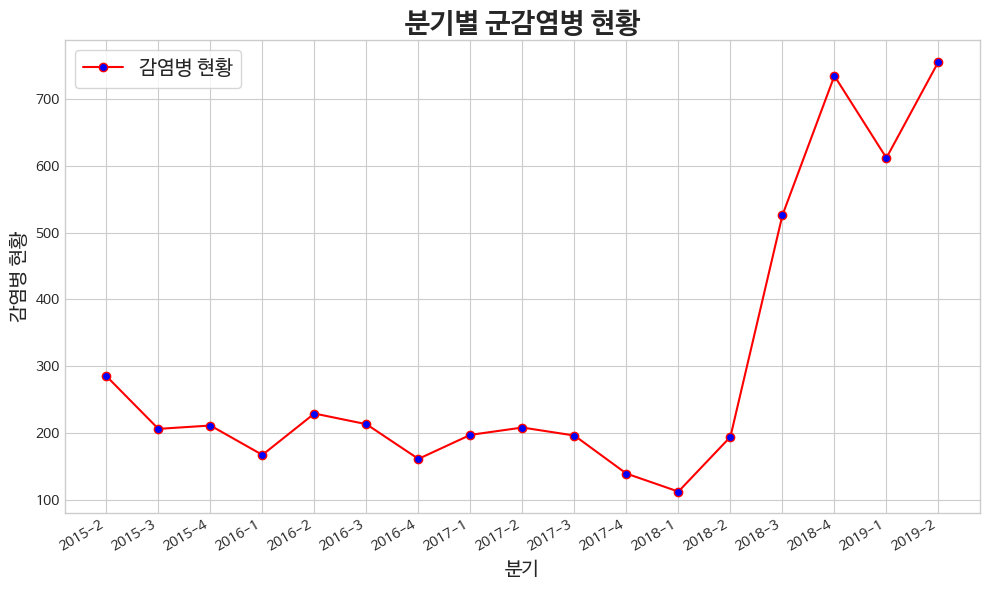

In [ ]:
# 그래프 스타일 지정하기
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('font', family="NanumBarunGothic") # 한글 설정

# 그래프 속성 설정하기
fig, ax = plt.subplots(1, figsize=(10, 6))

# X축, Y축 데이터 지정하기
x = df_temp.분기
y = df_temp.현황

# 그래프 데이터와 속성 설정하기
plt.plot(x, y, color = 'red',  linestyle='-', marker='o',  mfc='blue')

fig.autofmt_xdate()

# 그래프 제목 및 속성 설정하기
plt.title('분기별 군감염병 현황', fontdict={'fontsize': 20, 'weight': 'bold'})

# X, Y축에 제목 설정하기
plt.xlabel('분기', fontdict={'fontsize': 14})
plt.ylabel('감염병 현황', fontdict={'fontsize': 14})

# 그래프안에 데이터 설명(레전드) 넣기
plt.legend(['감염병 현황'], frameon=True, fontsize='x-large')

plt.tight_layout()

---

### 3.2. 분기별 기온 시각화

이번에는 `월별 기온 정보` 에 있는 데이터를 분기별로 시각화합니다.

`월별 기온 정보`를 확인해보면 지점별로 월평균기온 데이터를 확인할 수 있습니다.

DataFrame의 resample이라는 함수를 사용하면 기간별로 데이터를 쉽게 집계할 수 있습니다.

분기별로 집계하기 위해서 'Q' 파라미터를 활용하겠습니다.

In [ ]:
df_temperature

,지점,지점명,일시,평균기온(°C)
0,12,안면도(감),2015-01-01,0.3
1,12,안면도(감),2015-02-01,1.4
2,12,안면도(감),2015-03-01,4.8
3,12,안면도(감),2015-04-01,11.1
4,12,안면도(감),2015-05-01,15.0
...,...,...,...,...
30281,980,강정,2019-08-01,26.4
30282,980,강정,2019-09-01,23.6
30283,980,강정,2019-10-01,18.8
30284,980,강정,2019-11-01,14.2


In [ ]:
# '일시' 열을 인덱스로 지정하기
df_temperature.set_index('일시', inplace=True)
df_temperature.head()

,지점,지점명,평균기온(°C)
일시,,,
2015-01-01,12,안면도(감),0.3
2015-02-01,12,안면도(감),1.4
2015-03-01,12,안면도(감),4.8
2015-04-01,12,안면도(감),11.1
2015-05-01,12,안면도(감),15.0


In [ ]:
df_temperature['평균기온(°C)'].resample('Q').mean()

/tmp/ipykernel_61/1398755948.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_temperature['평균기온(°C)'].resample('Q').mean()


일시
2015-03-31     2.378389
2015-06-30    16.690751
2015-09-30    22.630348
2015-12-31     8.998800
2016-03-31     2.083966
2016-06-30    17.353049
2016-09-30    23.825506
2016-12-31     8.553242
2017-03-31     2.070895
2017-06-30    17.118538
2017-09-30    23.419004
2017-12-31     6.822142
2018-03-31     1.328742
2018-06-30    16.832034
2018-09-30    24.095282
2018-12-31     7.015339
2019-03-31     2.703215
2019-06-30    16.338900
2019-09-30    23.411730
2019-12-31     8.676567
Freq: QE-DEC, Name: 평균기온(°C), dtype: float64

In [ ]:
# resample 메서드를 활용하여 분기별로 모든 관측지역의 평균 기온을 구하기
quarterly_data = round(df_temperature['평균기온(°C)'].resample('Q').mean(), 2)
quarterly_data.head()

/tmp/ipykernel_61/3244716015.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = round(df_temperature['평균기온(°C)'].resample('Q').mean(), 2)


일시
2015-03-31     2.38
2015-06-30    16.69
2015-09-30    22.63
2015-12-31     9.00
2016-03-31     2.08
Freq: QE-DEC, Name: 평균기온(°C), dtype: float64

In [ ]:
# 분기별 평균 기온 데이터 인덱스 재설정 하여 '일시' 데이터를 열로 만들기
quarterly_data = quarterly_data.reset_index()
quarterly_data.head()

,일시,평균기온(°C)
0,2015-03-31,2.38
1,2015-06-30,16.69
2,2015-09-30,22.63
3,2015-12-31,9.00
4,2016-03-31,2.08


In [ ]:
# '일시'컬럼의 데이터를 '분기'컬럼으로 저장하기
quarterly_data['분기'] = quarterly_data['일시'].dt.year.astype(str) + '-' + quarterly_data['일시'].dt.quarter.astype(str)
quarterly_data.head()

,일시,평균기온(°C),분기
0,2015-03-31,2.38,2015-1
1,2015-06-30,16.69,2015-2
2,2015-09-30,22.63,2015-3
3,2015-12-31,9.00,2015-4
4,2016-03-31,2.08,2016-1


/tmp/ipykernel_61/522435699.py:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/home/elicer/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/home/elicer/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


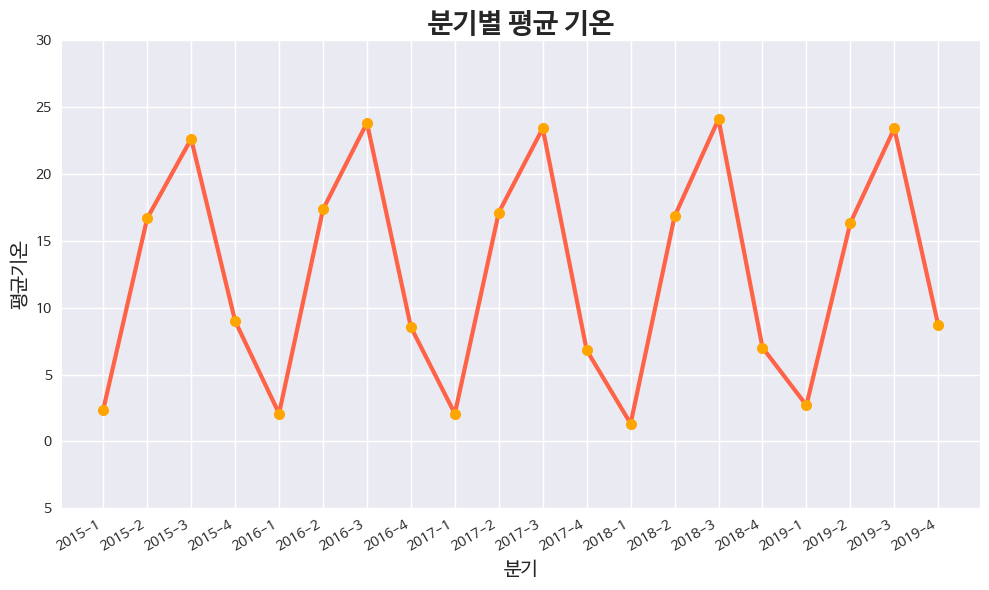

In [ ]:
# 그래프 스타일 지정하기
plt.style.use('seaborn-v0_8')
plt.rc('font', family="NanumBarunGothic") # 한글 설정

# 그래프 속성 설정하기
fig, ax1 = plt.subplots(1, figsize=(10, 6))

# x, y축 데이터 설정하기
x = quarterly_data['분기']
y = quarterly_data['평균기온(°C)']

# y축 제한 설정하기
plt.ylim(-5, 30)

# 그래프 데이터와 속성 설정하기
plt.plot(x, y, color = 'tomato',  linestyle='-', marker='o',  mfc='orange', linewidth = 3, markersize = 8)

#plt.grid(axis = 'x')
fig.autofmt_xdate()

# 그래프 제목 및 속성 설정하기
plt.title('분기별 평균 기온', fontdict={'fontsize': 20, 'weight': 'bold'})

# X, Y축에 제목 설정하기
plt.xlabel('분기', fontdict={'fontsize': 14})
plt.ylabel('평균기온', fontdict={'fontsize': 14})

plt.tight_layout()

---

### 3.3. 분기별 감염병 현황과 평균 기온 시각화

이번에는 두 데이터를 합쳐서 시각화해봅니다.

In [ ]:
# 먼저 분기별 평균 기온 데이터를 확인합니다.
quarterly_data

,일시,평균기온(°C),분기
0,2015-03-31,2.38,2015-1
1,2015-06-30,16.69,2015-2
2,2015-09-30,22.63,2015-3
3,2015-12-31,9.00,2015-4
4,2016-03-31,2.08,2016-1
5,2016-06-30,17.35,2016-2
6,2016-09-30,23.83,2016-3
7,2016-12-31,8.55,2016-4
8,2017-03-31,2.07,2017-1
9,2017-06-30,17.12,2017-2


In [ ]:
# 다음으로 분기별 감염병 현황 데이터를 확인합니다.
df_temp

,연도,분기구분,현황,분기
0,2015,2,285,2015-2
1,2015,3,206,2015-3
2,2015,4,211,2015-4
3,2016,1,167,2016-1
4,2016,2,229,2016-2
5,2016,3,213,2016-3
6,2016,4,161,2016-4
7,2017,1,197,2017-1
8,2017,2,208,2017-2
9,2017,3,196,2017-3


두 데이터를 확인하면, 분기 데이터를 기준으로 두 데이터를 병합할 수 있습니다.

In [ ]:
df_merge = df_temp.merge(quarterly_data, how='left', on='분기')[['분기', '현황', '평균기온(°C)']]
df_merge

,분기,현황,평균기온(°C)
0,2015-2,285,16.69
1,2015-3,206,22.63
2,2015-4,211,9.00
3,2016-1,167,2.08
4,2016-2,229,17.35
5,2016-3,213,23.83
6,2016-4,161,8.55
7,2017-1,197,2.07
8,2017-2,208,17.12
9,2017-3,196,23.42


병합된 데이터프레임을 시각화 합니다.

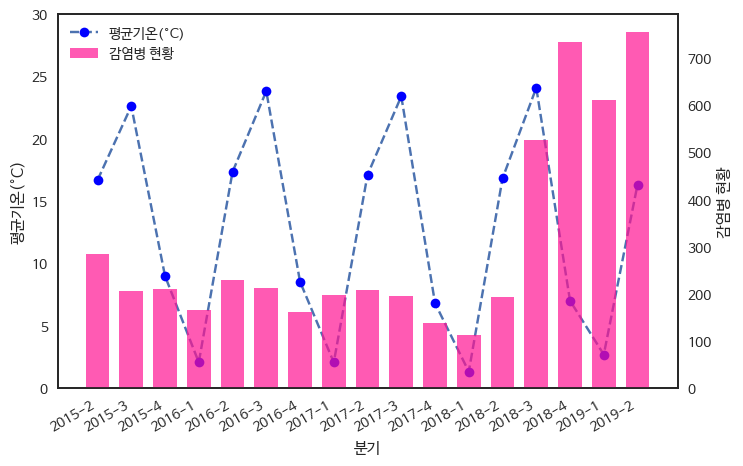

In [ ]:
# 데이터 설정하기
x = df_merge['분기']
y1 = df_merge['평균기온(°C)']
y2 = df_merge['현황']

plt.style.use('seaborn-v0_8-white')
plt.rc('font', family="NanumBarunGothic") # 한글 설정

# 그래프 생성
fig, ax1 = plt.subplots()

# 선그래프로 평균 기온을 그려줍니다.
ax1.plot(x, y1, linestyle='--', marker='o',  mfc='blue', label='평균기온(°C)')
ax1.set_xlabel('분기')
ax1.set_ylabel('평균기온(°C)')
plt.ylim(0, 30)

# twinx 메서드를 활용하여 y축이 다른 막대 그래프를 그립니다.
ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='감염병 현황', alpha=0.7, width=0.7)
ax2.set_ylabel('감염병 현황')

#
leg1, leg1_label = ax1.get_legend_handles_labels()
leg2, leg2_label = ax2.get_legend_handles_labels()
ax2.legend(leg1 + leg2, leg1_label + leg2_label)

fig.autofmt_xdate()

### 3.4. 감염병별 현황 시각화

감염병별 현황을 시각화하기 위해서 감염병 현황 데이터프레임 `df_disease`를 확인해 보겠습니다.

In [ ]:
df_disease

,연도,분기구분,질병명,현황,비고
0,2018,4,홍 역,0,0
1,2018,4,유행성 이하선염,0,0
2,2018,4,수 두,19,0
3,2018,4,결 핵,17,0
4,2018,4,말라리아,3,0
...,...,...,...,...,...
246,2018,3,매 독,38,0
247,2018,3,폐 렴,434,0
248,2018,4,A형 간염,0,0
249,2018,4,세균성 이질,0,0


위 데이터프레임은 연도-분기-질병으로 데이터가 나열되어 있는데, 감염병별로 데이터를 쉽게 확인하기 위해서 `groupby`함수를 써서 질병-연도-분기 형태로 변경하겠습니다.

이때 `현황`데이터의 합계를 컬럼값으로 설정하였습니다.

In [ ]:
df_disease3 = df_disease.groupby(['질병명', '연도', '분기구분'])['현황'].sum()
df_disease3

질병명    연도    분기구분
A형 간염  2015  2        1
             3        7
             4        2
       2016  1       12
             2        5
                     ..
홍 역    2018  2        0
             3        0
             4        0
       2019  1        0
             2        2
Name: 현황, Length: 251, dtype: int64

위 데이터프레임의 인덱스를 재설정하여 아래와 같이 데이터를 만들어줍니다.

In [ ]:
df_temp2 = df_disease3.reset_index()
df_temp2

,질병명,연도,분기구분,현황
0,A형 간염,2015,2,1
1,A형 간염,2015,3,7
2,A형 간염,2015,4,2
3,A형 간염,2016,1,12
4,A형 간염,2016,2,5
...,...,...,...,...
246,홍 역,2018,2,0
247,홍 역,2018,3,0
248,홍 역,2018,4,0
249,홍 역,2019,1,0


`연도` 컬럼과 `분기구분` 컬럼 데이터를 합쳐서 `분기` 컬럼데이터를 생성하여 연도별-분기 데이터를 만들겠습니다.

In [ ]:
df_temp2['분기'] = df_temp2['연도'].astype(str) + '-' + df_temp2['분기구분'].astype(str)
df_temp2

,질병명,연도,분기구분,현황,분기
0,A형 간염,2015,2,1,2015-2
1,A형 간염,2015,3,7,2015-3
2,A형 간염,2015,4,2,2015-4
3,A형 간염,2016,1,12,2016-1
4,A형 간염,2016,2,5,2016-2
...,...,...,...,...,...
246,홍 역,2018,2,0,2018-2
247,홍 역,2018,3,0,2018-3
248,홍 역,2018,4,0,2018-4
249,홍 역,2019,1,0,2019-1


In [ ]:
# 감염병별로 현황을 비교하기 위해 피봇 테이블 생성하기
df_disease4 = df_temp2.pivot_table(values = '현황', index = '분기', columns = '질병명')
df_disease4.head()

질병명,A형 간염,결 핵,렙토스피라증,말라리아,매 독,세균성 이질,수 두,수막구균성 수막염,신증후군 출혈열,유행성 이하선염,장티푸스,쯔쯔가무시증,파상풍,폐 렴,홍 역
분기,,,,,,,,,,,,,,,
2015-2,1.0,82.0,1.0,83.0,28.0,0.0,38.0,0.0,12.0,35.0,0.0,5.0,0.0,0.0,0.0
2015-3,7.0,67.0,2.0,57.0,22.0,0.0,32.0,0.0,8.0,8.0,0.0,3.0,0.0,0.0,0.0
2015-4,2.0,80.0,0.0,8.0,13.0,0.0,45.0,0.0,25.0,11.0,0.0,27.0,0.0,0.0,0.0
2016-1,12.0,73.0,0.0,1.0,19.0,0.0,35.0,0.0,8.0,16.0,0.0,3.0,0.0,0.0,0.0
2016-2,5.0,69.0,1.0,72.0,16.0,0.0,29.0,0.0,3.0,27.0,0.0,7.0,0.0,0.0,0.0


감염병별 현황을 시각화하겠습니다.

Text(0, 0.5, '감염병 현황')

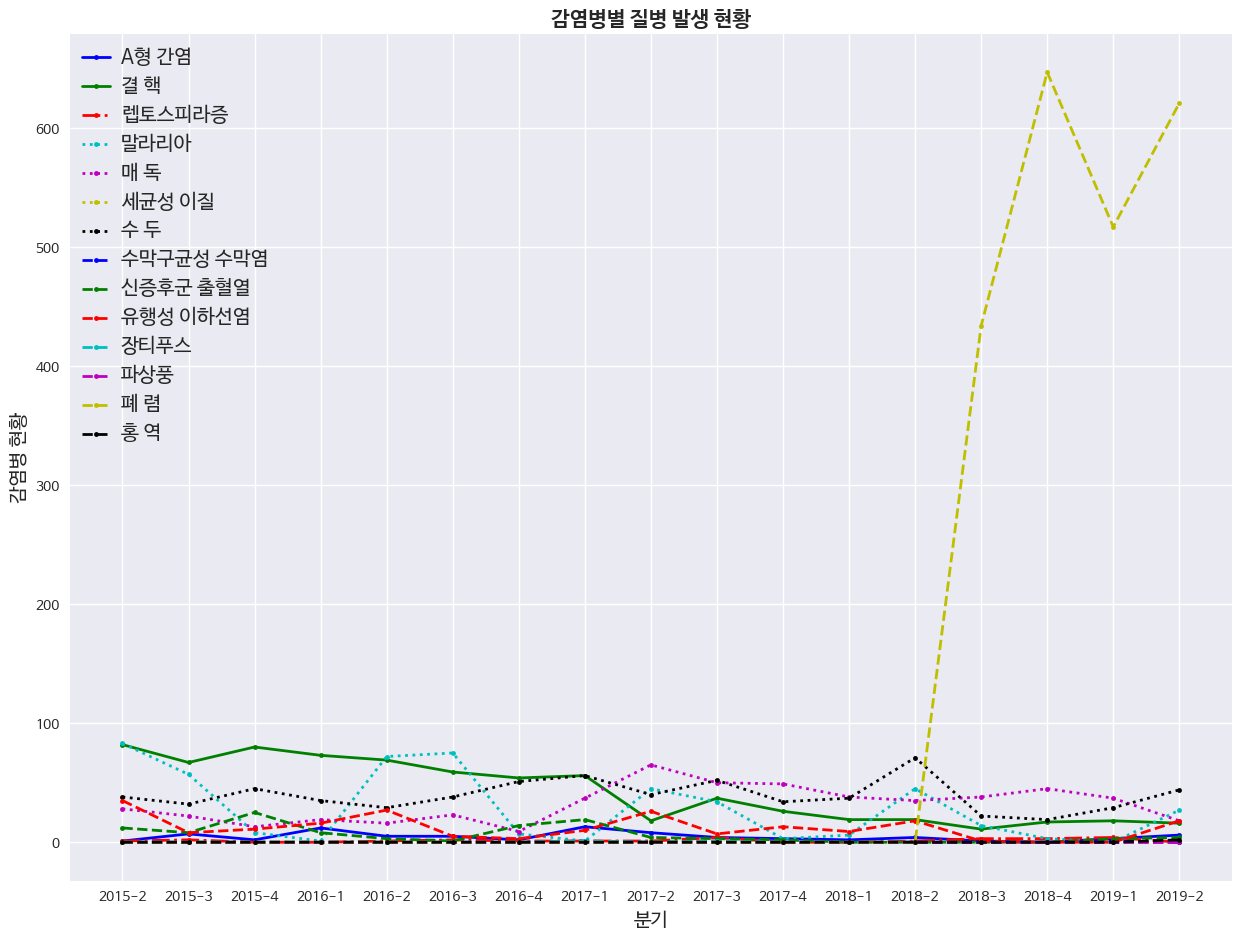

In [ ]:
# 그래프 스타일 지정하기
plt.style.use('seaborn-v0_8')
plt.rc('font', family="NanumBarunGothic") # 한글 설정

# 그래프 속성 설정하기
fig, ax1 = plt.subplots(1, figsize=(15, 11))

# x, y축 데이터 설정하기
x = df_disease4.reset_index()['분기']

y_1 = df_disease4['A형 간염']
y_2 = df_disease4['결 핵']
y_3 = df_disease4['렙토스피라증']
y_4 = df_disease4['말라리아']
y_5 = df_disease4['매 독']
y_6 = df_disease4['세균성 이질']
y_7 = df_disease4['수 두']
y_8 = df_disease4['수막구균성 수막염']
y_9 = df_disease4['신증후군 출혈열']
y_10 = df_disease4['유행성 이하선염']
y_11 = df_disease4['장티푸스']
y_12 = df_disease4['파상풍']
y_13 = df_disease4['폐 렴']
y_14 = df_disease4['홍 역']

# 그래프 데이터와 속성 설정하기
plt.rc('font', family="NanumBarunGothic")
plt.plot(x, y_1, '.-b', label = 'A형 간염', linewidth = 2)
plt.plot(x, y_2, '.-g', label = '결 핵', linewidth = 2)
plt.plot(x, y_3, '.-.r', label = '렙토스피라증', linewidth = 2)
plt.plot(x, y_4, '.:c', label = '말라리아', linewidth = 2)
plt.plot(x, y_5, '.:m', label = '매 독', linewidth = 2)
plt.plot(x, y_6, '.:y', label = '세균성 이질', linewidth = 2)
plt.plot(x, y_7, '.:k', label = '수 두', linewidth = 2)
plt.plot(x, y_8, '.--b', label = '수막구균성 수막염', linewidth = 2)
plt.plot(x, y_9, '.--g', label = '신증후군 출혈열', linewidth = 2)
plt.plot(x, y_10, '.--r', label = '유행성 이하선염', linewidth = 2)
plt.plot(x, y_11, '.--c', label = '장티푸스', linewidth = 2)
plt.plot(x, y_12, '.--m', label = '파상풍', linewidth = 2)
plt.plot(x, y_13, '.--y', label = '폐 렴', linewidth = 2)
plt.plot(x, y_14, '.--k', label = '홍 역', linewidth = 2)

leg = plt.legend()
# 그래프안에 선별 데이터 설명(범주박스) 넣기
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

# 한꺼번에 선별 속성
plt.setp(leg_lines, linewidth=2)
plt.setp(leg_texts, fontsize='x-large')

# 그래프 제목 및 속성 설정하기
plt.title('감염병별 질병 발생 현황', fontdict={'fontsize': 15, 'weight': 'bold'})

# X, Y축에 제목 설정하기
plt.xlabel('분기', fontdict={'fontsize': 14})
plt.ylabel('감염병 현황', fontdict={'fontsize': 14})

폐렴 데이터가 2018년도 3분기를 기준으로 많은 데이터 발생하고 있습니다.

In [ ]:
df_disease4['폐 렴']

분기
2015-2      0.0
2015-3      0.0
2015-4      0.0
2016-1      0.0
2016-2      0.0
2016-3      0.0
2016-4      0.0
2017-1      0.0
2017-2      0.0
2017-3      0.0
2017-4      0.0
2018-1      0.0
2018-2      0.0
2018-3    434.0
2018-4    647.0
2019-1    517.0
2019-2    621.0
Name: 폐 렴, dtype: float64

마지막으로 감염병별로 시각화를 하겠습니다.

/home/elicer/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/home/elicer/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


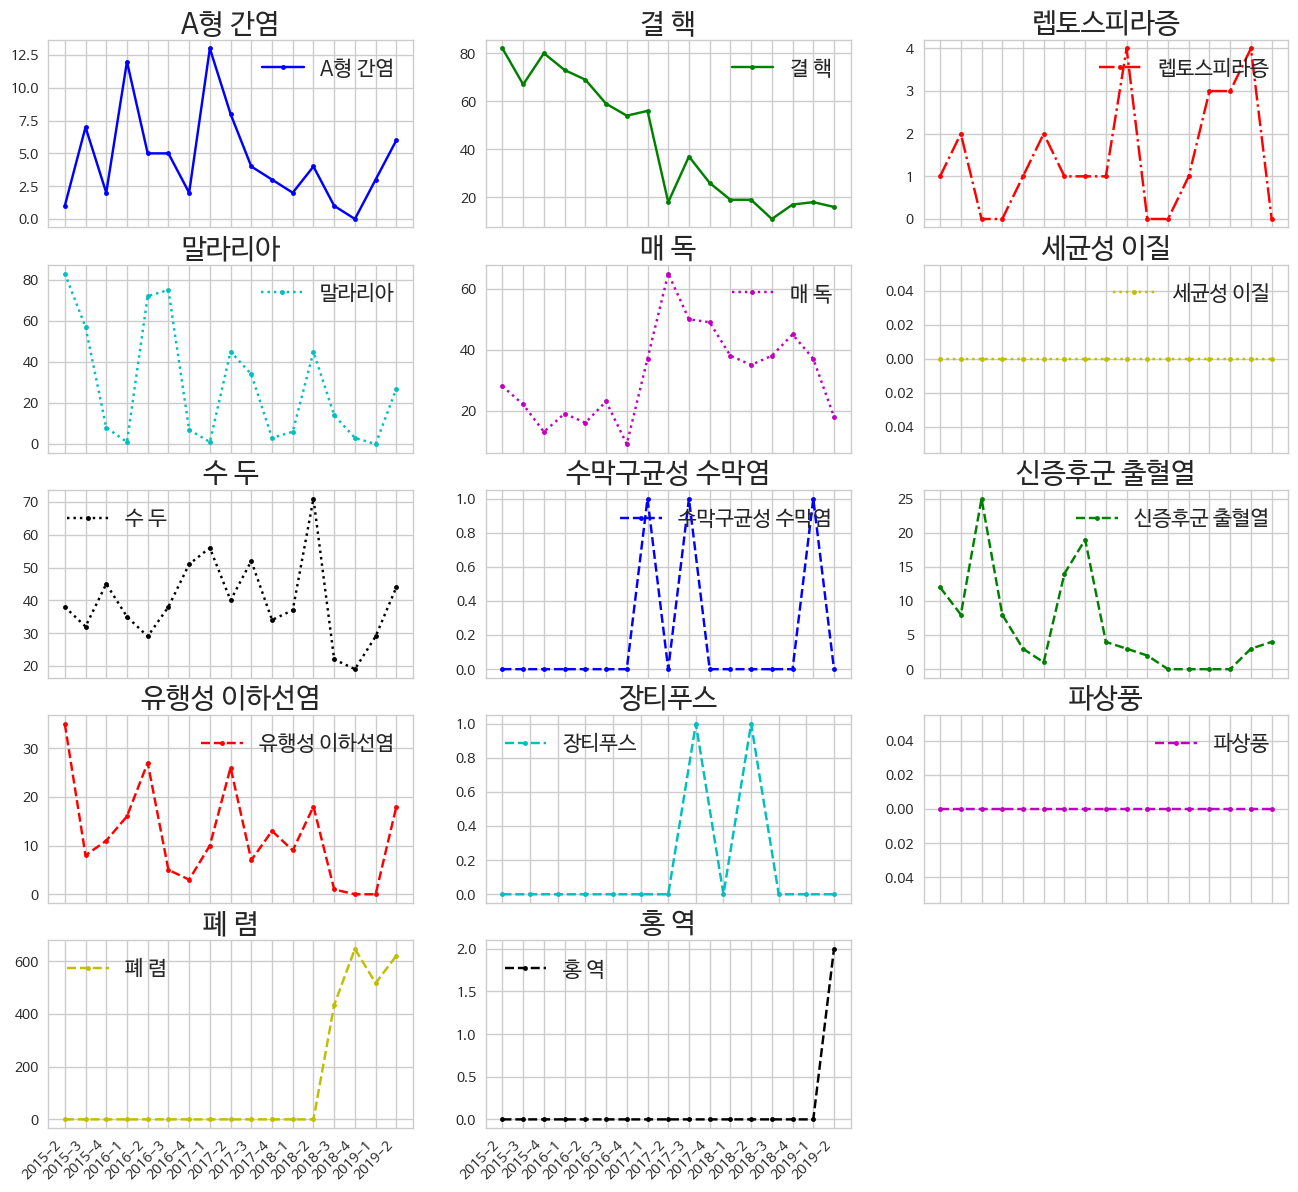

In [ ]:
# 그래프 스타일 지정하기
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('font', family="NanumBarunGothic") # 한글 설정

# 14개의 감염병을 그려주기 위해서 row=5, column=3 으로 subplot을 설정합니다.
fig, axes = plt.subplots(5, 3, figsize=(16, 16))

# x, y축 데이터 설정하기
x = df_disease4.reset_index()['분기']

y_1 = df_disease4['A형 간염']
y_2 = df_disease4['결 핵']
y_3 = df_disease4['렙토스피라증']
y_4 = df_disease4['말라리아']
y_5 = df_disease4['매 독']
y_6 = df_disease4['세균성 이질']
y_7 = df_disease4['수 두']
y_8 = df_disease4['수막구균성 수막염']
y_9 = df_disease4['신증후군 출혈열']
y_10 = df_disease4['유행성 이하선염']
y_11 = df_disease4['장티푸스']
y_12 = df_disease4['파상풍']
y_13 = df_disease4['폐 렴']
y_14 = df_disease4['홍 역']

# 그래프 데이터와 속성 설정하기
axes[0][0].plot(x, y_1, '.-b', label = 'A형 간염')
axes[0][0].legend(fontsize=15)
axes[0][0].set_title('A형 간염', size=20)

axes[0][1].plot(x, y_2, '.-g', label = '결 핵')
axes[0][1].legend(fontsize=15)
axes[0][1].set_title('결 핵', size=20)

axes[0][2].plot(x, y_3, '.-.r', label = '렙토스피라증')
axes[0][2].legend(fontsize=15)
axes[0][2].set_title('렙토스피라증', size=20)

axes[1][0].plot(x, y_4, '.:c', label = '말라리아')
axes[1][0].legend(fontsize=15)
axes[1][0].set_title('말라리아', size=20)

axes[1][1].plot(x, y_5, '.:m', label = '매 독')
axes[1][1].legend(fontsize=15)
axes[1][1].set_title('매 독', size=20)

axes[1][2].plot(x, y_6, '.:y', label = '세균성 이질')
axes[1][2].legend(fontsize=15)
axes[1][2].set_title('세균성 이질', size=20)

axes[2][0].plot(x, y_7, '.:k', label = '수 두')
axes[2][0].legend(fontsize=15)
axes[2][0].set_title('수 두', size=20)

axes[2][1].plot(x, y_8, '.--b', label = '수막구균성 수막염')
axes[2][1].legend(fontsize=15)
axes[2][1].set_title('수막구균성 수막염', size=20)

axes[2][2].plot(x, y_9, '.--g', label = '신증후군 출혈열')
axes[2][2].legend(fontsize=15)
axes[2][2].set_title('신증후군 출혈열', size=20)

axes[3][0].plot(x, y_10, '.--r', label = '유행성 이하선염')
axes[3][0].legend(fontsize=15)
axes[3][0].set_title('유행성 이하선염', size=20)

axes[3][1].plot(x, y_11, '.--c', label = '장티푸스')
axes[3][1].legend(fontsize=15)
axes[3][1].set_title('장티푸스', size=20)

axes[3][2].plot(x, y_12, '.--m', label = '파상풍')
axes[3][2].legend(fontsize=15)
axes[3][2].set_title('파상풍', size=20)

axes[4][0].plot(x, y_13, '.--y', label = '폐 렴')
axes[4][0].legend(fontsize=15)
axes[4][0].set_title('폐 렴', size=20)

axes[4][1].plot(x, y_14, '.--k', label = '홍 역')
axes[4][1].legend(fontsize=15)
axes[4][1].set_title('홍 역', size=20)

axes[4][2].axis('off') # 빈 그래프를 그리지 않습니다.

fig.autofmt_xdate(rotation=45)

---